In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/reports/seqkit_stats/demultiplexed_report.txt"

columns = [
    'file', 
    'num_seqs', 
    'sum_len',
    # 'avg_len',
    'N50',
    'AvgQual',
    # 'GC(%)',
]

def read_seqkit(fpath, splitter=".raw"):
    df = pd.read_csv(fpath, delim_whitespace=True, usecols=columns)
    df['Sample'] = df['file'].apply(lambda x: x.split(".")[0])
    return df

df = read_seqkit(fpath)
df = df[['Sample', 
         'num_seqs', 
         'sum_len', 
         # 'avg_len', 
         'N50',
         'AvgQual',
         # 'GC(%)'
        ]]

df = df.rename(columns={
    'num_seqs' : 'Total Reads',
    'sum_len' : 'Total Bases',
    # 'avg_len' : 'Read Length (mean)',
    'N50' : 'Read N50',
    'AvgQual' : 'Base Quality',
})

print(df.to_latex(index=False))

\begin{tabular}{lllrr}
\toprule
   Sample & Total Reads &    Total Bases &  Read N50 &  Base Quality \\
\midrule
   Gridr1 &  11,030,820 &  8,119,964,837 &       751 &         12.48 \\
   Gridr2 &  13,534,992 &  9,876,965,416 &       747 &         12.14 \\
   Gridr3 &   9,599,263 &  6,880,813,324 &       730 &         11.88 \\
   Gridr4 &   9,213,117 &  6,313,606,949 &       703 &         11.81 \\
     P2r5 &  29,881,286 & 19,901,617,912 &       688 &         14.40 \\
     P2r6 &  23,412,245 & 15,719,109,142 &       694 &         14.80 \\
     P2r7 &  23,576,025 & 15,494,282,065 &       674 &         14.49 \\
Run6x0426 &     730,345 &    424,665,479 &       605 &         12.61 \\
Run5x0314 &      66,824 &     55,488,659 &       872 &         10.77 \\
Run1x0312 &      87,233 &     67,651,211 &       805 &         10.81 \\
Run6x0314 &      69,623 &     57,776,834 &       869 &         10.80 \\
Run7x0426 &      44,175 &     25,704,825 &       603 &         12.55 \\
Run2x0313 &      77,992

/tmp/ipykernel_206204/1406401971.py:36: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [28]:
df['total_reads'] = df['Total Reads'].str.replace(",", "").astype(int)
df['total_bases'] = df['Total Bases'].str.replace(",", "").astype(int)

df[['total_reads', 'total_bases']].sum()

total_reads      126590757
total_bases    86714113814
dtype: int64

In [ ]:
break

In [5]:
df.columns

Index(['file', 'format', 'type', 'num_seqs', 'sum_len', 'min_len', 'avg_len',
       'max_len', 'Q1', 'Q2', 'Q3', 'sum_gap', 'N50', 'Q20(%)', 'Q30(%)',
       'AvgQual', 'GC(%)', 'Platform', 'Run'],
      dtype='object')

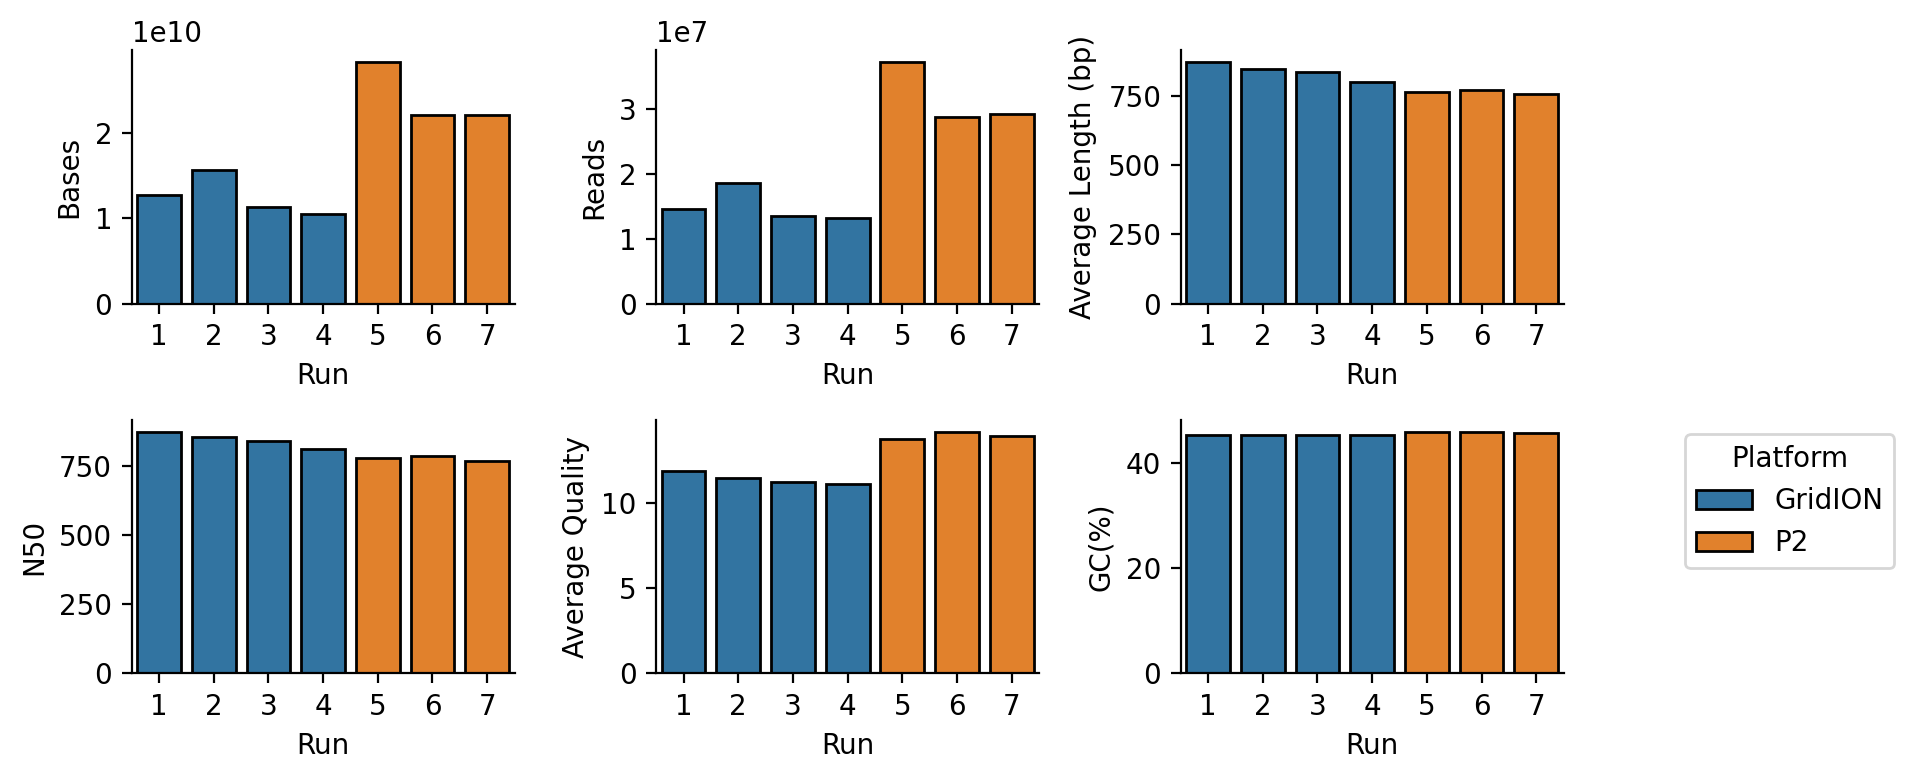

In [70]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 4


fig, axs = plt.subplots(2, 3)
axs = axs.ravel()

columns = {
    'Bases' : 'sum_len',
    'Reads' : 'num_seqs',
    'Average Length (bp)' : 'avg_len',
    'N50' : 'N50',
    'Average Quality' : 'AvgQual',
    'GC(%)' : 'GC(%)',
}

for i, (label, column) in enumerate(columns.items()):

    sns.barplot(data=df, 
                x='Run',
                y=column,
                hue='Platform',
                dodge=False,
                ec='k',
                ax=axs[i])

    axs[i].set_ylabel(label)
    axs[i].set_xlabel("Run")
    
    if not i == len(columns) -1:
        axs[i].legend().remove()
    else:
        sns.move_legend(axs[i],
                        loc='upper right',
                        bbox_to_anchor=(1.9, 1))

plt.tight_layout()
sns.despine()

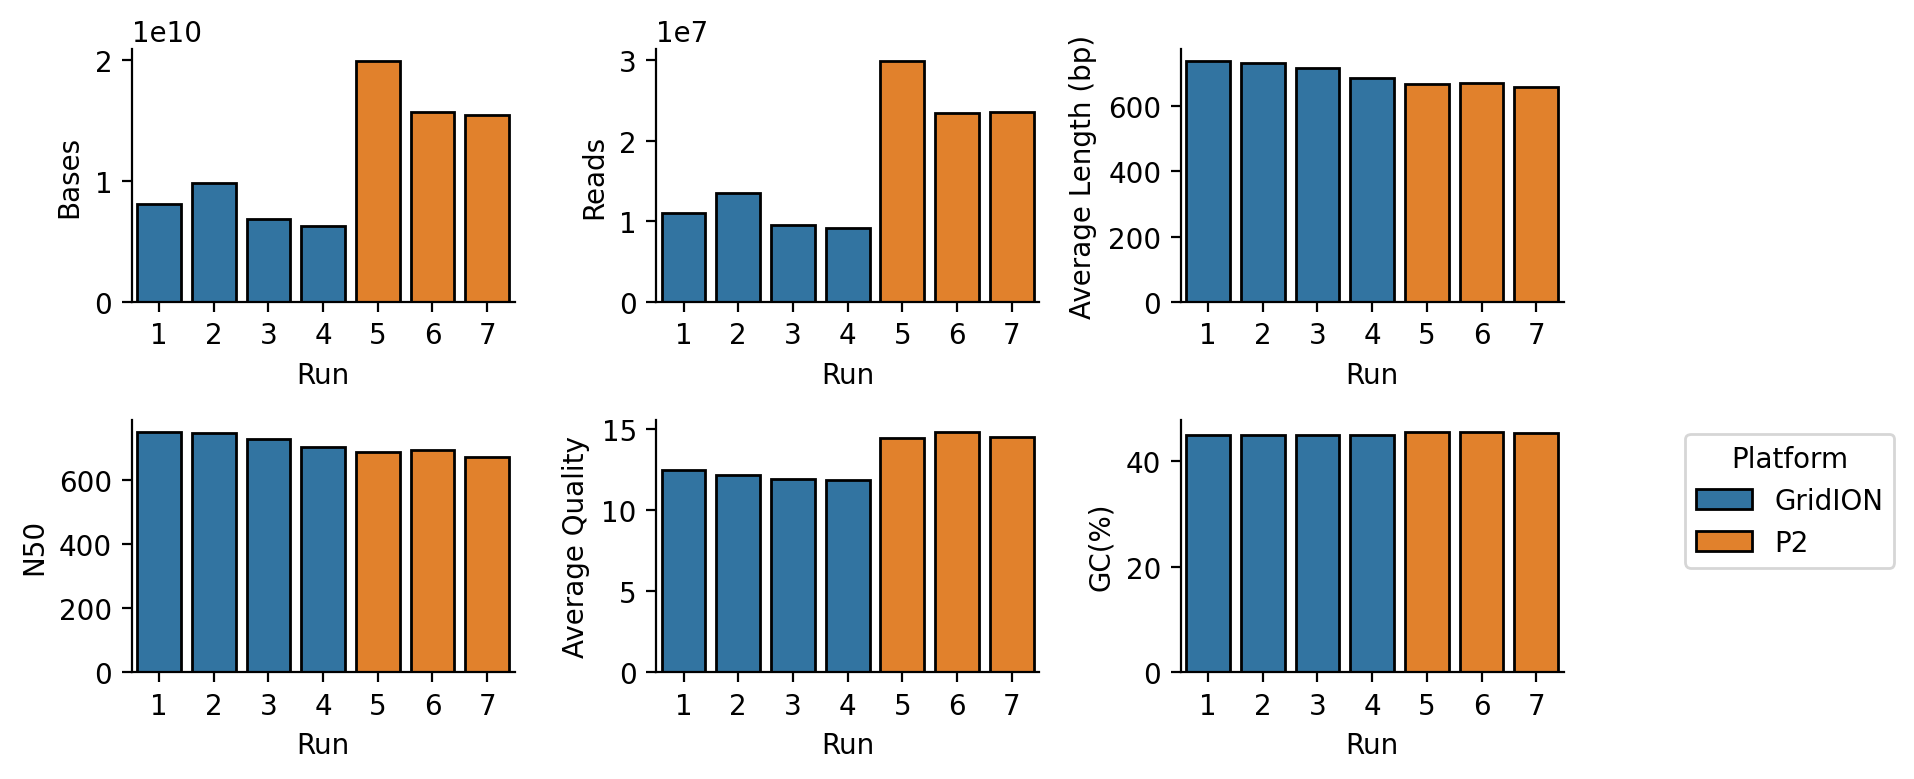

In [77]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/reports/seqkit_stats/demultiplexed_report.txt"

df = read_seqkit(fpath, splitter=".matched")
df

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 4


fig, axs = plt.subplots(2, 3)
axs = axs.ravel()

columns = {
    'Bases' : 'sum_len',
    'Reads' : 'num_seqs',
    'Average Length (bp)' : 'avg_len',
    'N50' : 'N50',
    'Average Quality' : 'AvgQual',
    'GC(%)' : 'GC(%)',
}

for i, (label, column) in enumerate(columns.items()):

    sns.barplot(data=df, 
                x='Run',
                y=column,
                hue='Platform',
                dodge=False,
                ec='k',
                ax=axs[i])

    axs[i].set_ylabel(label)
    axs[i].set_xlabel("Run")
    
    if not i == len(columns) -1:
        axs[i].legend().remove()
    else:
        sns.move_legend(axs[i],
                        loc='upper right',
                        bbox_to_anchor=(1.9, 1))

plt.tight_layout()
sns.despine()

# demultiplexing summary

In [104]:
dirpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/demultiplex/"

def read_summary(fpath):
    row = {}
    for i, line in enumerate(open(fpath)):
        if i == 5:
            row['total'] = int(line.strip().replace(",", ""))
        if i == 7:
            row['with_adapter'] = int(line.split("(")[0].strip().replace(",", ""))
        if i == 8:
            row['with_adapter_high_qual'] = int(line.split("in")[0].strip().replace(",", ""))
        if i == 11:
            row['no_adapater'] = int(line.split("(")[0].strip().replace(",", ""))
        if i == 13:
            row['no_strand'] = int(line.split("(")[0].strip().replace(",", ""))
        if i == 15:
            row['multiple'] = int(line.split("(")[0].strip().replace(",", ""))
    return row

res = []
for f in os.listdir(dirpath):
    if "summary" in f:
        fpath = f"{dirpath}{f}"
        row = read_summary(fpath)
        row['Platform'] = "GridION" if "Grid" in f else 'P2'
        row['Run'] = f.split(".summary")[0][-1]
        res.append(row)

res = pd.DataFrame(res)
res = res.sort_values(by='Run')
res

,total,with_adapter,with_adapter_high_qual,no_adapater,no_strand,multiple,Platform,Run
6,14626355,12959895,4207955,928353,422445,315662,GridION,1
2,18559099,16260686,4783650,1297368,547177,453868,GridION,2
0,13515053,11730858,3131448,954506,450111,379578,GridION,3
4,13118213,11347350,2895175,970661,429765,370437,GridION,4
3,37114089,33289169,17822919,2884707,493019,447194,P2,5
5,28766054,25846931,14892488,2202621,388797,327705,P2,6
1,29195157,26106462,14121081,2334757,410406,343532,P2,7


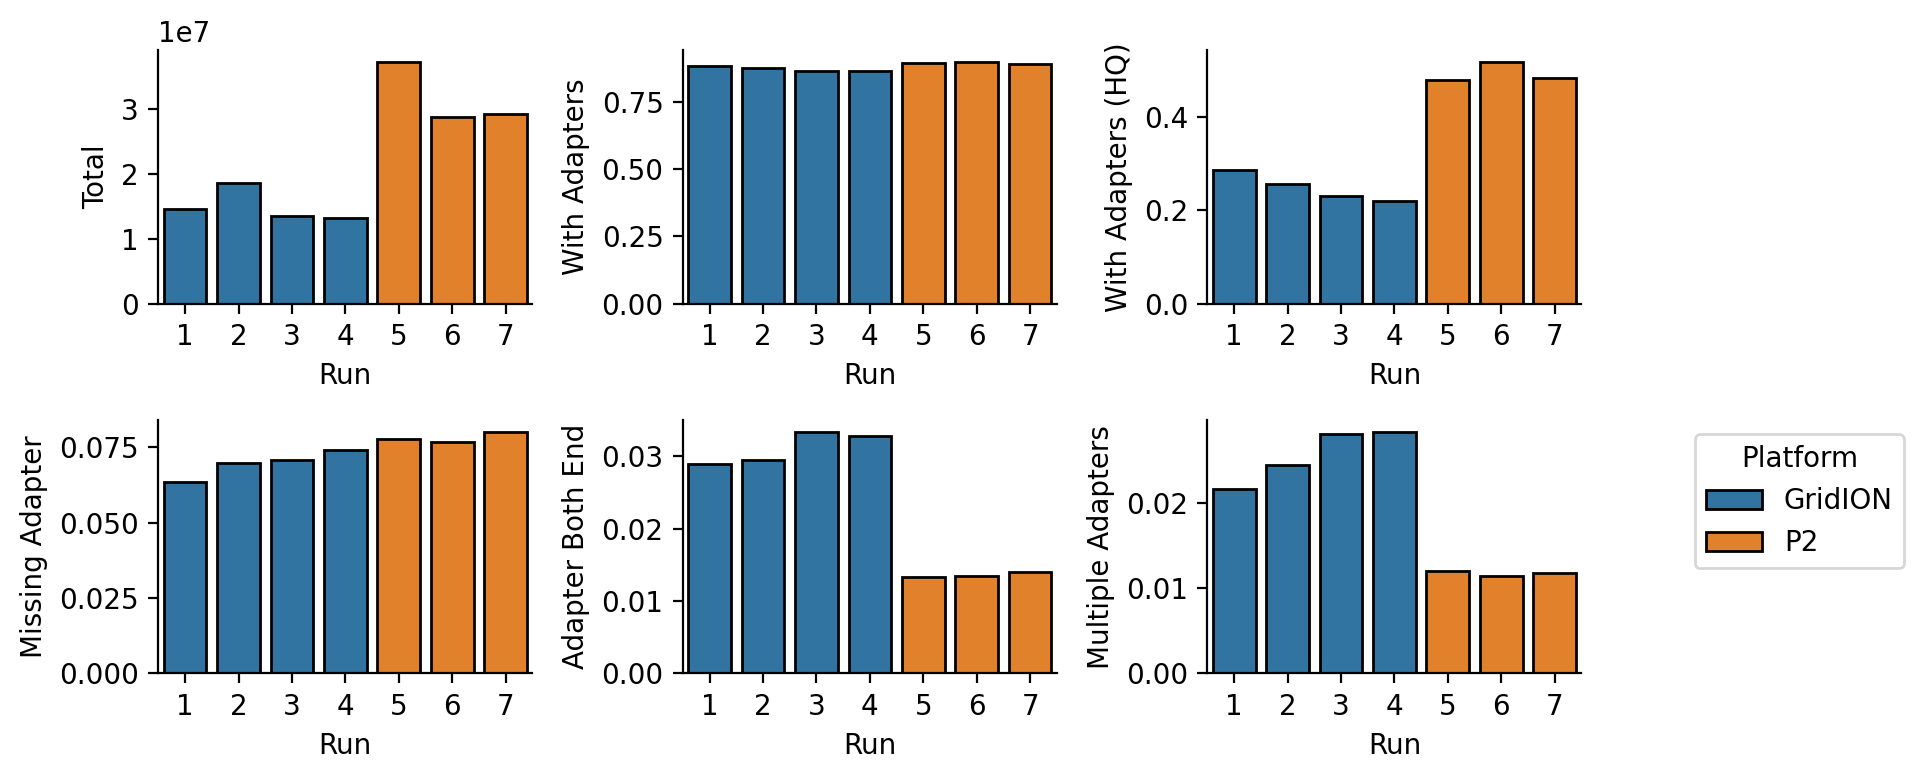

In [107]:
columns = {
    "Total" : 'total',
    "With Adapters" : 'with_adapter',
    "With Adapters (HQ)" : 'with_adapter_high_qual',
    "Missing Adapter" : 'no_adapater',
    "Adapter Both End" : 'no_strand',
    "Multiple Adapters" : 'multiple',
}


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 4


fig, axs = plt.subplots(2, 3)
axs = axs.ravel()

for i, (label, column) in enumerate(columns.items()):


    if not column == "total":
        vals = res[column] / res['total']
        sns.barplot(data=res, 
                    x='Run',
                    y=vals,
                    hue='Platform',
                    dodge=False,
                    ec='k',
                    ax=axs[i])
    else:
        sns.barplot(data=res, 
                    x='Run',
                    y=column,
                    hue='Platform',
                    dodge=False,
                    ec='k',
                    ax=axs[i])

    axs[i].set_ylabel(label)
    axs[i].set_xlabel("Run")
    
    if not i == len(columns) -1:
        axs[i].legend().remove()
    else:
        sns.move_legend(axs[i],
                        loc='upper right',
                        bbox_to_anchor=(1.9, 1))

plt.tight_layout()
sns.despine()

# alignability

,percent_mapped,Platform,Run
3,98.5294,GridION,1
2,98.4924,GridION,2
4,98.4581,GridION,3
0,97.6404,GridION,4
6,97.3854,P2,5
1,97.4653,P2,6
5,97.4380,P2,7


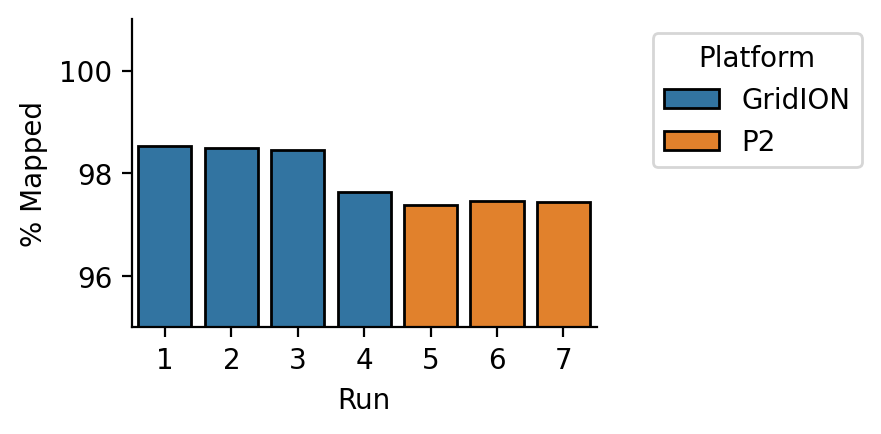

In [156]:
dirpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/reports/bamstats/"

def read_bamstats(fpath):
    row = {}
    for i, line in enumerate(open(fpath)):
        if i == 6:
            row['percent_mapped'] = float(line.split("\t")[1].strip().replace("(", "").replace(")", "").replace("%", ""))
    return row

res = []
for f in os.listdir(dirpath):
    if not f.endswith("log"):
        fpath = f"{dirpath}{f}"
        row = read_bamstats(fpath)
        row['Platform'] = "GridION" if "Grid" in f else 'P2'
        row['Run'] = f.split(".bamstats")[0][-1]
        res.append(row)

res = pd.DataFrame(res)
res = res.sort_values(by='Run')

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 2

sns.barplot(data=res, 
            x='Run',
            y='percent_mapped',
            hue='Platform',
            dodge=False,
            ec='k')

plt.ylabel("% Mapped")
plt.xlabel("Run")
plt.ylim([95, 101])
sns.despine()
sns.move_legend(plt.gca(),
                loc='upper right',
                bbox_to_anchor=(1.6, 1))
res
